# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [40]:
# import everything we need
import numpy as np
import pandas as pd
print("set up complete")

set up complete


In [41]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [42]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

df = pd.read_csv('boston.csv')
df = df.iloc[:, 1:] #discard the first column
print(df.head())
print(df.shape)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


# Visualize

visualize the correlational data with scatterplot

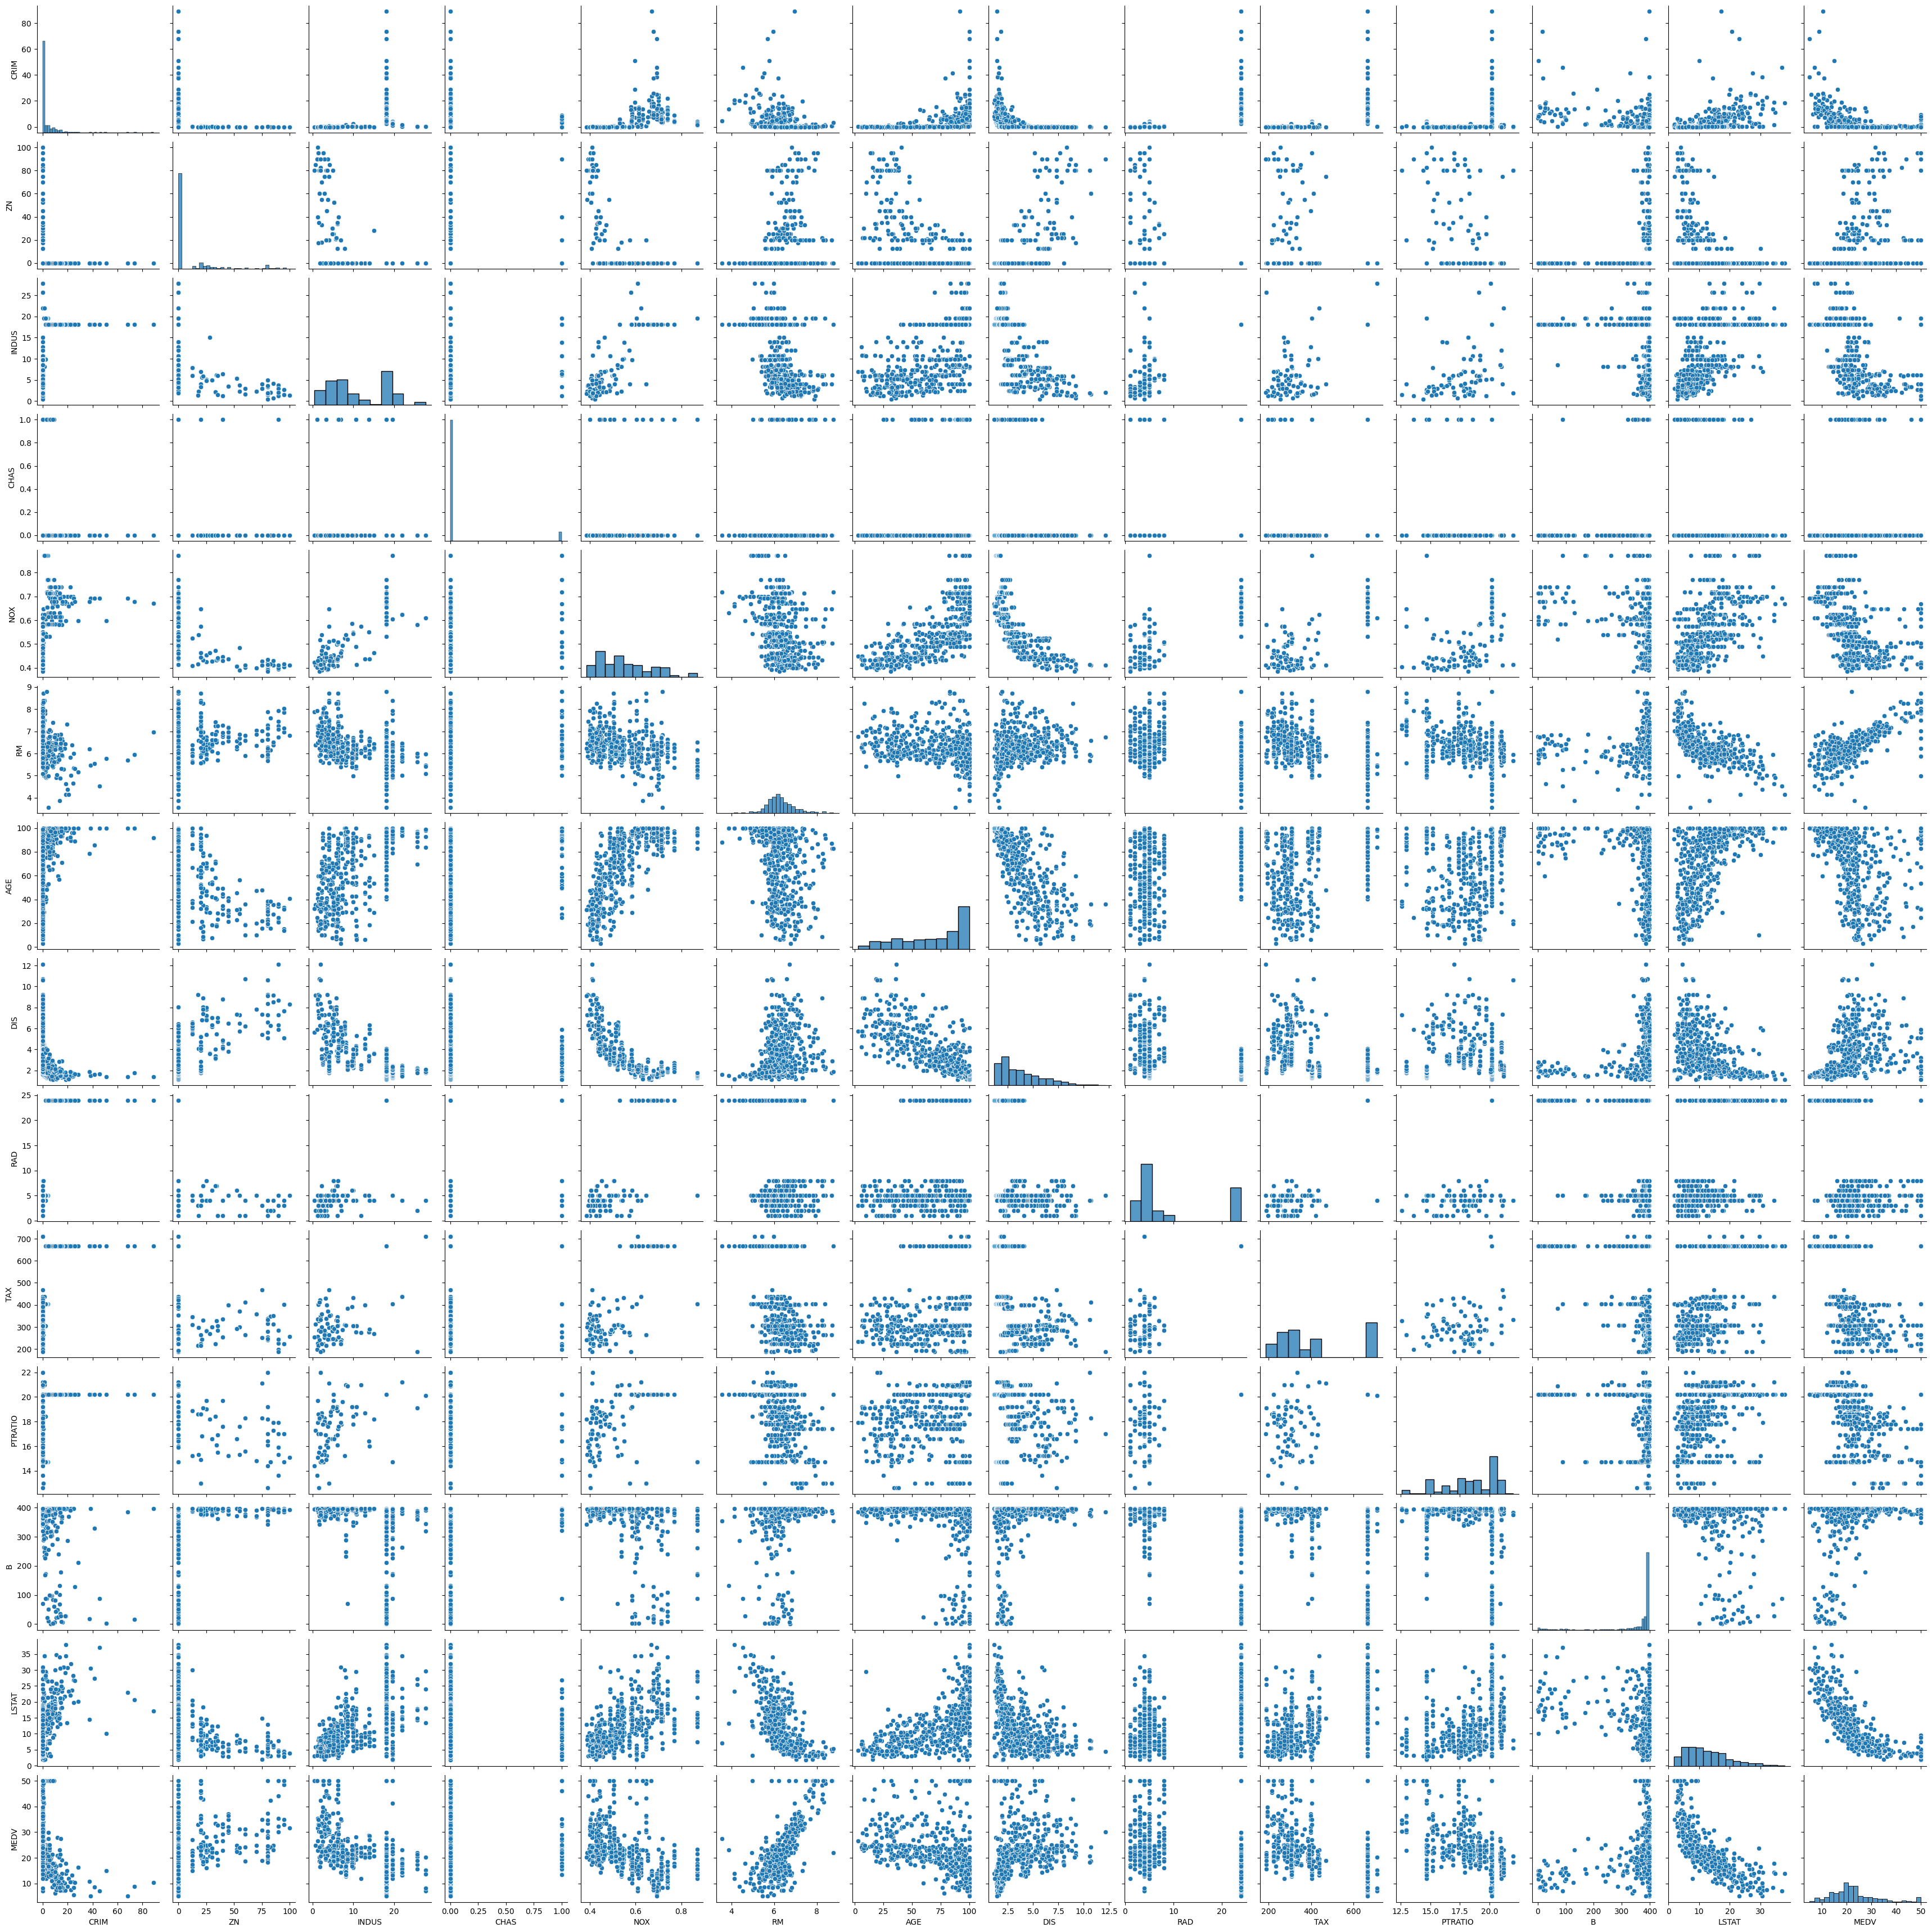

In [43]:
import seaborn as sns
sns.pairplot(df)

In [44]:
pearson_corr_mat = df.corr()
print(pearson_corr_mat)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Text(0, 0.5, 'distance to employment centre')

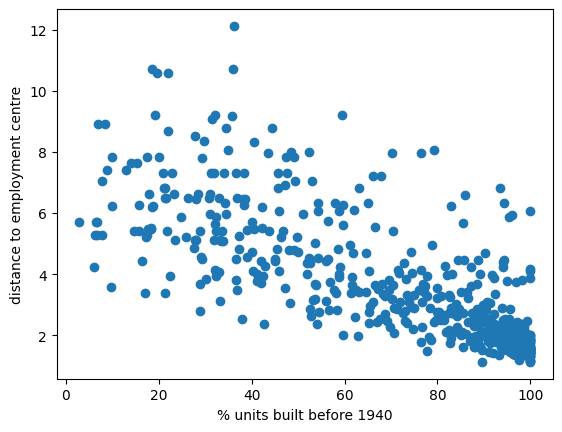

In [45]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(df.AGE, df.DIS)
plt.xlabel('% units built before 1940')
plt.ylabel('distance to employment centre')

## Model Training

In [46]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [47]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
# We need 2D arrays for x_train 
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

In [ ]:
age = df['AGE']
distance = df[['DIS']]

x_train, x_test, y_train, y_test = train_test_split(age, distance, test_size = 0.2, random_state=42)

# print("x-train: \n {} \n y-train: \n {}".format(percentLowSE, medianHomeValue))

linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [54]:
print(x_test[:])
y_pred = linReg.predict(x_test) 

        DIS
173  2.6463
274  4.0776
491  1.8681
72   5.2873
452  2.3682
..      ...
412  1.5539
436  2.0026
411  1.5275
86   4.4272
75   4.5026

[102 rows x 1 columns]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [55]:
from sklearn.metrics import r2_score

# we can see the coefficient and intercept our model finds
m = linReg.coef_
c = linReg.intercept_
print(f"Univariate linear regression eqn: \n Distance = {m[0]:.3f} %UnitsBuiltBefore1940 + {c:.3f} \n")
print(f'r2_score: {r2_score(y_test, y_pred):.5f}')



Univariate linear regression eqn: 
 Distance = -9.938 %UnitsBuiltBefore1940 + 106.403 

r2_score: 0.51007


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

In [ ]:
linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Plot the regression line (blue) vs the actual value (red)

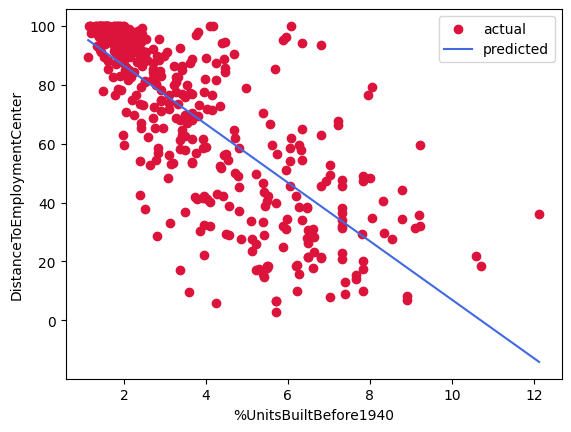

In [59]:
# We want to plot the regression line(blue) vs the actual value(red)

linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

y_pred = linReg.predict(x_train)

# plot y_pred vs x_test
x_vals = x_train.flatten()
order = x_vals.argsort()

plt.scatter(x_vals, y_train, color='crimson', label='actual')
plt.plot(x_vals[order], y_pred[order], color='royalblue', label='predicted')
plt.xlabel('%UnitsBuiltBefore1940')
plt.ylabel('DistanceToEmploymentCenter')
plt.legend()
plt.show()
